In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats
import plotly.express as px

# Se cargan los datos y se visualiza la estructura

In [2]:
df = pd.read_csv("/media/jonathan/JHON/Tesis/DatosTesis/DatosDesplazamiento/maestra1-mitma-distritos/ficheros-diarios/20200214_maestra_1_mitma_distrito.csv", 
                 dtype={"fecha": str, "origen": str, "destino": str}, sep='|')

In [3]:
df.head()

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
0,20200214,01001_AM,01001_AM,casa,otros,1,NaN,0,002-005,9.775,35.601
1,20200214,01001_AM,01001_AM,casa,otros,1,NaN,0,005-010,8.754,72.488
2,20200214,01001_AM,01001_AM,casa,otros,1,NaN,1,002-005,8.431,30.339
3,20200214,01001_AM,01001_AM,casa,otros,1,NaN,1,010-050,9.775,100.837
4,20200214,01001_AM,01001_AM,casa,otros,1,NaN,2,002-005,6.007,23.952


In [4]:
dimension = df.shape
tipos_de_datos = df.dtypes

print("Dimensión:")
print(dimension)
print(" ")
print(tipos_de_datos)

Dimensión:
(7232427, 11)
 
fecha                 object
origen                object
destino               object
actividad_origen      object
actividad_destino     object
residencia             int64
edad                 float64
periodo                int64
distancia             object
viajes               float64
viajes_km            float64
dtype: object


# Se describen las columnas viajes y viajes_km

In [5]:
nuevo_df = df.loc[:, ['viajes', 'viajes_km']]
nuevo_df.describe()

,viajes,viajes_km
count,7.232427e+06,7.232427e+06
mean,2.006682e+01,2.063435e+02
std,5.847253e+01,5.234273e+02
min,3.330000e-01,2.110000e-01
25%,5.326000e+00,3.761000e+01
50%,8.147000e+00,8.660500e+01
75%,1.630500e+01,1.990320e+02
max,6.129252e+03,1.679801e+05


# Se verifica la cantidad de datos por categoria

In [6]:
df['distancia'].value_counts()

010-050     2618377
005-010     1630590
002-005     1428801
0005-002    1008205
050-100      318657
100+         227797
Name: distancia, dtype: int64

In [7]:
df['actividad_origen'].value_counts()

otros      3716855
casa       2291198
trabajo    1224374
Name: actividad_origen, dtype: int64

In [8]:
# df['residencia'].value_counts()

# Se verifican las variables categoricas

In [9]:
categorias_unicas_edad = df['edad'].unique()
print(categorias_unicas_edad)

[nan]


In [10]:
categorias_unicas_edad = df['periodo'].unique()
print(categorias_unicas_edad)

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  4]


In [11]:
categorias_unicas_origen = df['origen'].nunique()
print(categorias_unicas_origen)
categorias_unicas_destino = df['destino'].nunique()
print(categorias_unicas_destino)

2839
2839


# Correlación

In [12]:
df

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
0,20200214,01001_AM,01001_AM,casa,otros,1,NaN,0,002-005,9.775,35.601
1,20200214,01001_AM,01001_AM,casa,otros,1,NaN,0,005-010,8.754,72.488
2,20200214,01001_AM,01001_AM,casa,otros,1,NaN,1,002-005,8.431,30.339
3,20200214,01001_AM,01001_AM,casa,otros,1,NaN,1,010-050,9.775,100.837
4,20200214,01001_AM,01001_AM,casa,otros,1,NaN,2,002-005,6.007,23.952
...,...,...,...,...,...,...,...,...,...,...,...
7232422,20200214,5200108,5200108,trabajo,otros,52,NaN,20,0005-002,62.860,78.437
7232423,20200214,5200108,5200108,trabajo,otros,52,NaN,21,0005-002,23.569,34.537
7232424,20200214,5200108,5200108,trabajo,otros,52,NaN,21,002-005,11.225,22.570
7232425,20200214,5200108,5200108,trabajo,otros,52,NaN,22,0005-002,11.225,21.040


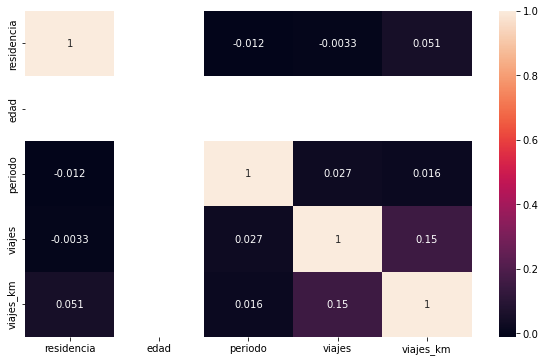

In [13]:
plt.figure(figsize=(10, 6))
sample_data = df.sample(n=1000)  # Por ejemplo, toma una muestra de 1000 registros
correlation_matrix = sample_data.corr()
#correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [14]:
sample_data.shape

(1000, 11)

# Se realiza BoxPlot considerando todos los distritos de españa

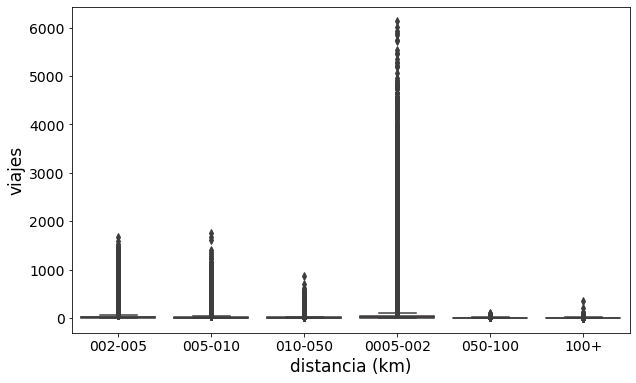

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='distancia',y='viajes',data=df)
plt.xlabel('distancia (km)', fontsize=17)
plt.ylabel('viajes', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

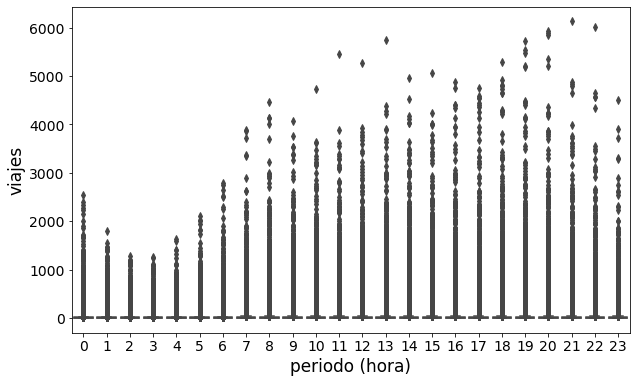

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='periodo',y='viajes',data=df)
plt.xlabel('periodo (hora)', fontsize=17)
plt.ylabel('viajes', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Se realiza BoxPlot considerando un origen y un destino en Madrid

In [17]:
df = pd.read_csv("/media/jonathan/JHON/Tesis/DatosTesis/DatosDesplazamiento/maestra1-mitma-distritos/ficheros-diarios/20200214_maestra_1_mitma_distrito.csv", 
                 dtype={"fecha": str, "origen": str, "destino": str}, sep='|')

df_filtrado = df.loc[df['origen'] == '2807905'] 
df_filtrado2 = df_filtrado.loc[df_filtrado['destino'] == '2807901'] 
df_filtrado2

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
3821102,20200214,2807905,2807901,casa,otros,28,NaN,0,0005-002,4.750,7.953
3821103,20200214,2807905,2807901,casa,otros,28,NaN,0,002-005,23.751,94.771
3821104,20200214,2807905,2807901,casa,otros,28,NaN,0,005-010,14.251,82.127
3821105,20200214,2807905,2807901,casa,otros,28,NaN,1,002-005,19.001,61.454
3821106,20200214,2807905,2807901,casa,otros,28,NaN,1,005-010,14.250,74.583
...,...,...,...,...,...,...,...,...,...,...,...
3821720,20200214,2807905,2807901,trabajo,otros,33,NaN,10,005-010,7.273,38.201
3821721,20200214,2807905,2807901,trabajo,otros,45,NaN,12,002-005,5.291,15.960
3821722,20200214,2807905,2807901,trabajo,otros,45,NaN,14,002-005,8.947,29.076
3821723,20200214,2807905,2807901,trabajo,otros,45,NaN,15,002-005,4.143,19.426


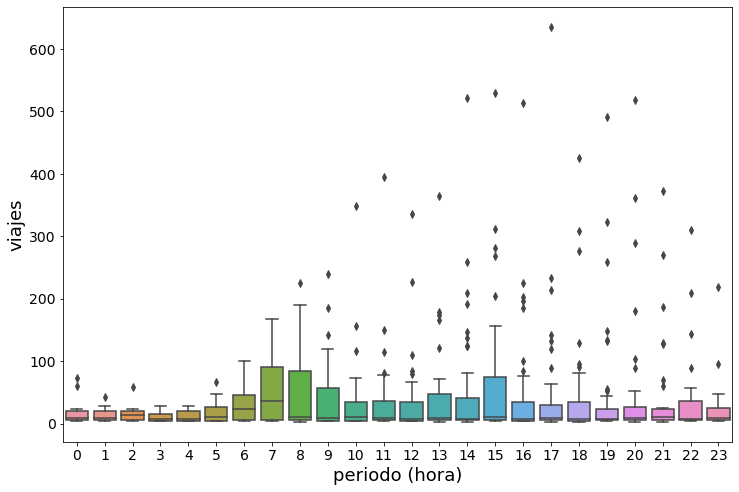

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='periodo',y='viajes',data=df_filtrado2)
plt.xlabel('periodo (hora)',fontsize=18)
plt.ylabel('viajes', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

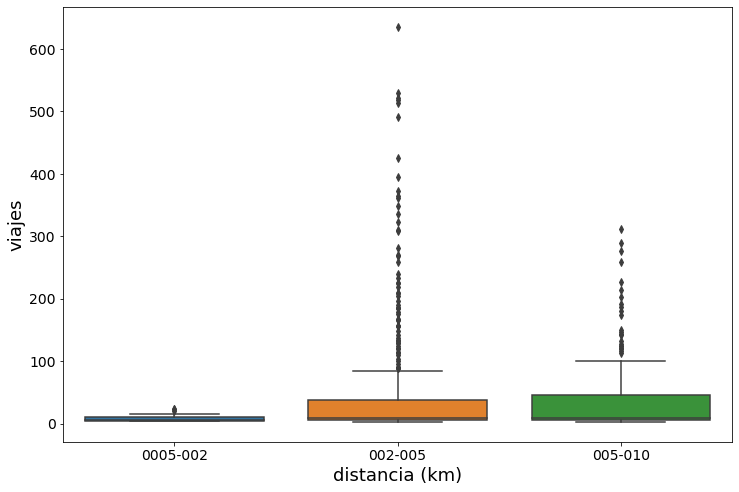

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='distancia',y='viajes',data=df_filtrado2)
plt.xlabel('distancia (km)', fontsize=18)
plt.ylabel('viajes', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Verificamos mes de junio

In [20]:
df_jun = pd.read_csv("/media/jonathan/JHON/Tesis/DatosTesis/DatosDesplazamiento/maestra1-mitma-distritos/ficheros-diarios/20200601_maestra_1_mitma_distrito.csv", 
                 dtype={"fecha": str, "origen": str, "destino": str}, sep='|')
df_jun.head()

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
0,20200601,01001_AM,01001_AM,casa,otros,1,NaN,0,005-010,12.511,87.909
1,20200601,01001_AM,01001_AM,casa,otros,1,NaN,1,005-010,13.226,104.449
2,20200601,01001_AM,01001_AM,casa,otros,1,NaN,1,010-050,6.431,85.739
3,20200601,01001_AM,01001_AM,casa,otros,1,NaN,2,005-010,7.877,63.754
4,20200601,01001_AM,01001_AM,casa,otros,1,NaN,2,010-050,12.511,154.389


In [21]:
df_filtrado_jun = df_jun.loc[df_jun['origen'] == '2807905'] 
df_filtrado2_jun = df_filtrado_jun.loc[df_filtrado_jun['destino'] == '2807901'] 
df_filtrado2_jun

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
2828961,20200601,2807905,2807901,casa,otros,28,NaN,0,002-005,11.008,41.100
2828962,20200601,2807905,2807901,casa,otros,28,NaN,1,002-005,11.008,41.319
2828963,20200601,2807905,2807901,casa,otros,28,NaN,1,005-010,5.504,29.072
2828964,20200601,2807905,2807901,casa,otros,28,NaN,2,002-005,5.504,15.106
2828965,20200601,2807905,2807901,casa,otros,28,NaN,3,002-005,11.008,41.811
...,...,...,...,...,...,...,...,...,...,...,...
2829215,20200601,2807905,2807901,trabajo,otros,28,NaN,20,005-010,6.032,36.933
2829216,20200601,2807905,2807901,trabajo,otros,28,NaN,21,002-005,21.181,73.827
2829217,20200601,2807905,2807901,trabajo,otros,28,NaN,22,002-005,16.120,63.718
2829218,20200601,2807905,2807901,trabajo,otros,28,NaN,23,005-010,4.895,26.748


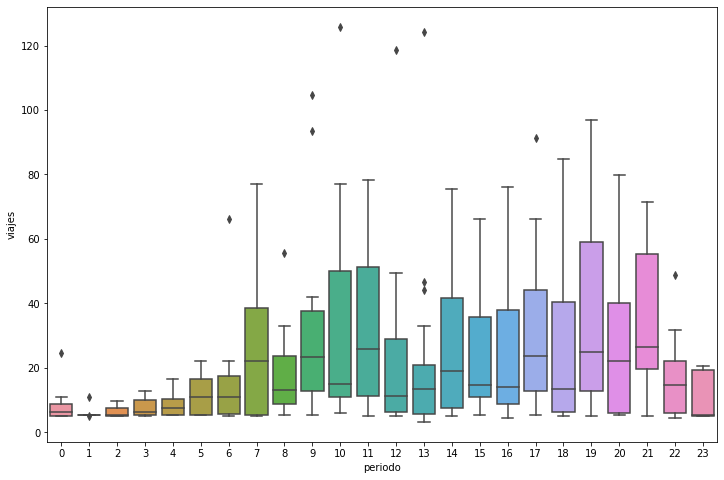

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='periodo',y='viajes',data=df_filtrado2_jun)
plt.show()

In [23]:
nuevo_df_jun = df_filtrado2_jun.loc[:, ['viajes', 'viajes_km']]
nuevo_df_jun.describe()

,viajes,viajes_km
count,259.000000,259.000000
mean,23.791834,105.840942
std,24.555034,104.186018
min,3.178000,8.640000
25%,5.788000,30.122500
50%,14.685000,60.820000
75%,32.339500,151.987500
max,125.856000,490.018000


In [24]:
df_filtrado3_jun = df_filtrado2_jun.loc[df['periodo'] == 1] 
df_filtrado3_jun

,fecha,origen,destino,actividad_origen,actividad_destino,residencia,edad,periodo,distancia,viajes,viajes_km
2829105,20200601,2807905,2807901,otros,otros,28,NaN,14,005-010,67.234,406.897
2829147,20200601,2807905,2807901,otros,trabajo,28,NaN,14,002-005,5.572,16.638
2829162,20200601,2807905,2807901,trabajo,casa,28,NaN,6,002-005,4.895,9.947
2829202,20200601,2807905,2807901,trabajo,otros,28,NaN,14,005-010,19.127,107.346


# Verificamos valores nulos

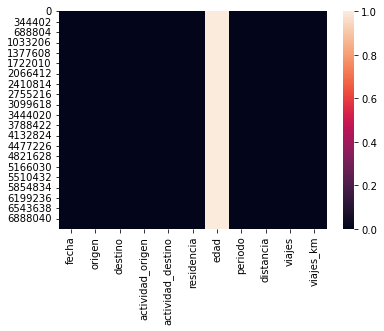

In [25]:
sns.heatmap(df.isnull())
plt.show()

In [26]:
null_counts = df.isnull().sum()
print(null_counts)

fecha                      0
origen                     0
destino                    0
actividad_origen           0
actividad_destino          0
residencia                 0
edad                 7232427
periodo                    0
distancia                  0
viajes                     0
viajes_km                  0
dtype: int64


In [27]:
'?' in df.values

False